## **IMAGE CLASSIFIER WITH CNN**

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

In [28]:
df = pd.read_csv('mnist_test.csv')

In [29]:
X = df.drop('label', axis=1).values
y = df['label'].values

In [30]:
X = X / 255.0 # Normalize pixel values to [0, 1]

In [31]:
X = X.reshape(-1, 28, 28, 1)

In [32]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [34]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [35]:
y_train_cat = to_categorical(y_train, num_classes=10)
y_val_cat = to_categorical(y_val, num_classes=10)

In [36]:
history = model.fit(X_train, y_train_cat, epochs=5, batch_size=128, validation_data=(X_val, y_val_cat))

Epoch 1/5
63/63 [==============================] - 4s 39ms/step - loss: 0.7960 - accuracy: 0.7756 - val_loss: 0.2765 - val_accuracy: 0.9120
Epoch 2/5
63/63 [==============================] - 2s 30ms/step - loss: 0.1892 - accuracy: 0.9423 - val_loss: 0.1623 - val_accuracy: 0.9530
Epoch 3/5
63/63 [==============================] - 2s 31ms/step - loss: 0.1003 - accuracy: 0.9703 - val_loss: 0.1223 - val_accuracy: 0.9655
Epoch 4/5
63/63 [==============================] - 2s 32ms/step - loss: 0.0690 - accuracy: 0.9785 - val_loss: 0.1006 - val_accuracy: 0.9685
Epoch 5/5
63/63 [==============================] - 2s 31ms/step - loss: 0.0513 - accuracy: 0.9852 - val_loss: 0.1095 - val_accuracy: 0.9690


In [37]:
val_loss, val_acc = model.evaluate(X_val, y_val_cat)
print("Validation Accuracy:", val_acc)

63/63 [==============================] - 0s 6ms/step - loss: 0.1095 - accuracy: 0.9690
Validation Accuracy: 0.968999981880188


In [38]:
# Predict and visualize results using validation set
y_probs = model.predict(X_val)
y_pred_labels = np.argmax(y_probs, axis=1)
true_labels = y_val
confidences = np.max(y_probs, axis=1)


63/63 [==============================] - 1s 7ms/step


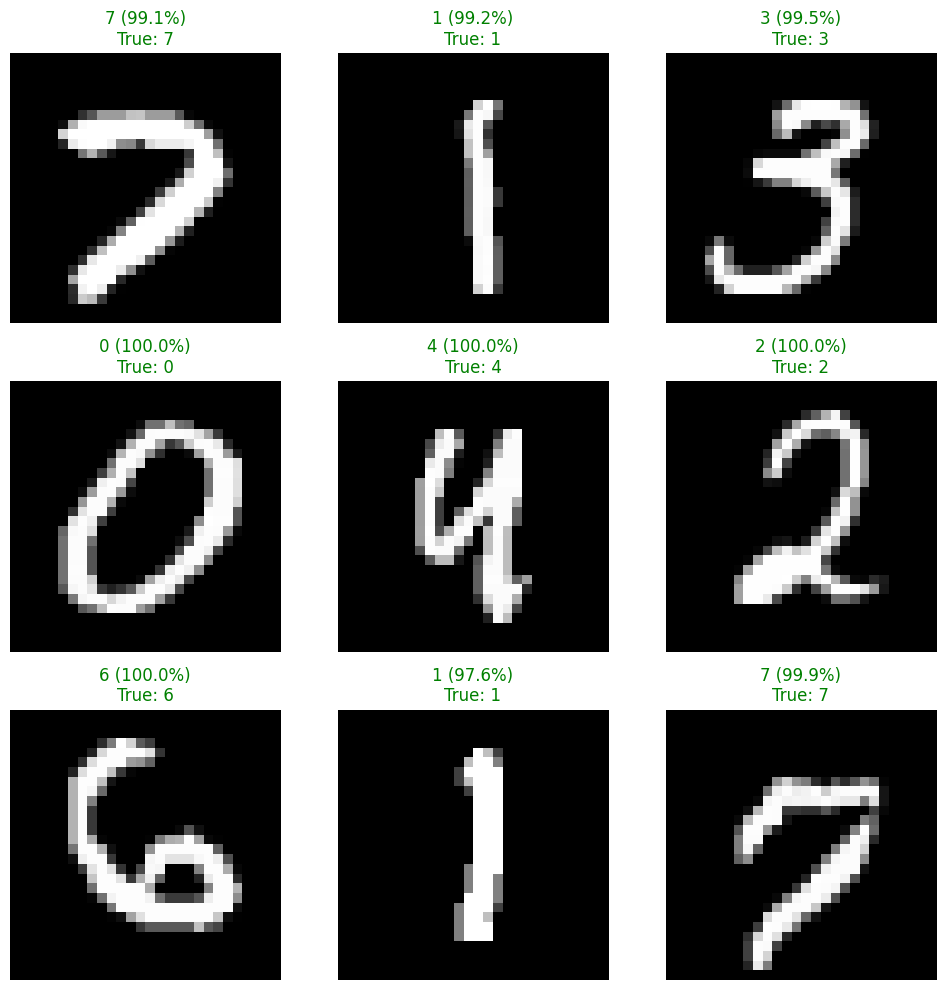

In [39]:
indices = np.random.choice(len(X_val), 9, replace=False)
plt.figure(figsize=(10, 10))
for i, idx in enumerate(indices):
    image = X_val[idx].reshape(28, 28)
    true_label = true_labels[idx]
    pred_label = y_pred_labels[idx]
    confidence = confidences[idx] * 100

    plt.subplot(3, 3, i + 1)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    color = 'green' if pred_label == true_label else 'red'
    plt.title(f"{pred_label} ({confidence:.1f}%)\nTrue: {true_label}", color=color)

plt.tight_layout()
plt.show()